In [1]:

import numpy as np
import time
import math

from coremerge import get_transmats, get_world_gaussian
from snn import define_object_pose, produce_snn_stats
from visuals import plot_gaussians, visualize_3d
from utils import data2text, generate_pdfs

In [2]:

'''
This function produces 3 PDFs from SNN stats and one from the product of these
The function plots the PDFs (in 3 subplots, one per axis) and returns two arrays: mu and sigma
'''
def emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario):

    ####################################################################################
    ## Get info from: optitrack (camera poses) + snn (object poses + stds)
    ####################################################################################
    
    # Get transformation matrix (from camera to world) for each camera
    c2w = get_transmats(cam_poses)

    # Define object pose: ground truth and as seen from each camera
    perspective = define_object_pose(c2w, ground_truth, delta)

    # Get stats from validation dataset
    cam_pdf_params = produce_snn_stats(e_per)

    ####################################################################################
    ## Merge observations (This is the core of the 'problem')  
    ####################################################################################
    
    start = time.time()

    # Convert gaussians from camera space to world space and generate PDFs
    mu_c, sigma_c, mu_w, sigma_w = get_world_gaussian(perspective, cam_pdf_params, c2w)

    stop = time.time()
    elapsed = stop - start
    print("Global x,y,z obtained after: " + str(1000000*elapsed) + " us")     

    ####################################################################################
    # Visualize Gaussians
    ####################################################################################
    xyz_w, pdf_w = generate_pdfs(nb_pts, ground_truth, mu_w, sigma_w) 
    text = data2text(ground_truth, cam_poses, mu_c, sigma_c, mu_w, sigma_w)
    plot_gaussians(xyz_w, pdf_w, text, scenario)    

        
    return mu_w, sigma_w

     

In [3]:
scenario = 0

All cameras at the origin, same <mu|sigma>_<x|y|z> for all cameras
Global x,y,z obtained after: 107.76519775390625 us
The estimated object location has the following error in [mm]: (0.000, 0.000, 0.000)


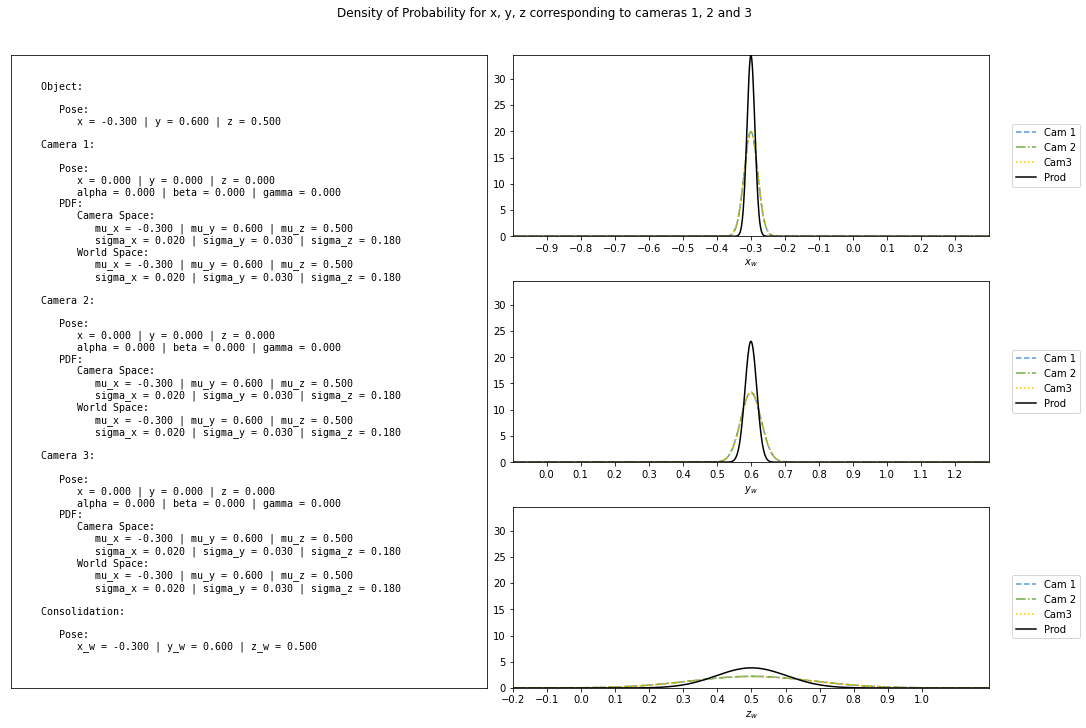

In [4]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = 0 # cam1:cx
cam_poses[0,1] = 0 # cam1:cy
cam_poses[0,2] = 0 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(0) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(0) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(0) # cam1:gamma

# Cam 2
cam_poses[1,0] = 0 # cam2:cx
cam_poses[1,1] = 0 # cam2:cy
cam_poses[1,2] = 0 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(0) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(0) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = 0 # cam3:cx
cam_poses[2,1] = 0 # cam3:cy
cam_poses[2,2] = 0 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(0)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(0)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(0)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1]
delta = 0.0 # cameras are homogeneous

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.03, 0.18]) # 2%, 3%, 18%

print("All cameras at the origin, same <mu|sigma>_<x|y|z> for all cameras")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario)


All cameras with different (x, y, z) coordinates, same <mu|sigma>_<x|y|z> for all cameras
Global x,y,z obtained after: 55.3131103515625 us
The estimated object location has the following error in [mm]: (0.000, 0.000, 0.000)


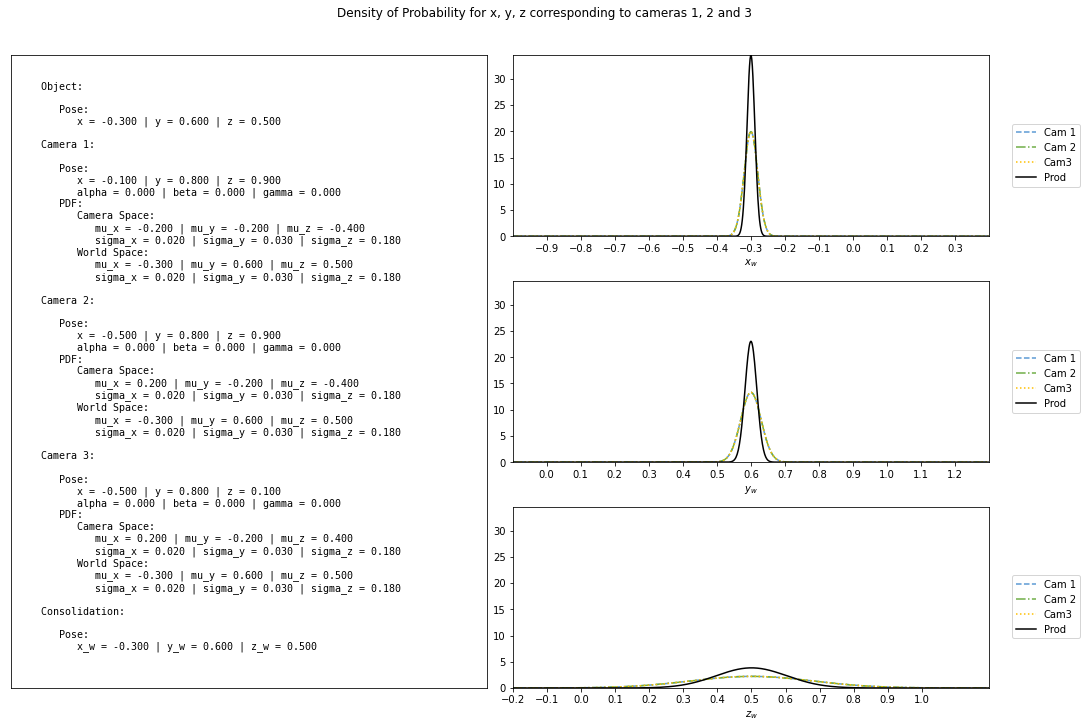

In [5]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = -0.1 # cam1:cx
cam_poses[0,1] =  0.8 # cam1:cy
cam_poses[0,2] =  0.9 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(0) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(0) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(0) # cam1:gamma

# Cam 2
cam_poses[1,0] = -0.5 # cam2:cx
cam_poses[1,1] =  0.8 # cam2:cy
cam_poses[1,2] =  0.9 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(0) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(0) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = -0.5 # cam3:cx
cam_poses[2,1] =  0.8 # cam3:cy
cam_poses[2,2] =  0.1 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(0)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(0)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(0)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1]
delta = 0.0 # cameras are homogeneous

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.03, 0.18]) 

print("All cameras with different (x, y, z) coordinates, same <mu|sigma>_<x|y|z> for all cameras")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario)


Two cameras aligned, same <mu|sigma>_<x|y|z> for all cameras
Global x,y,z obtained after: 55.789947509765625 us
The estimated object location has the following error in [mm]: (0.000, 0.000, 0.000)


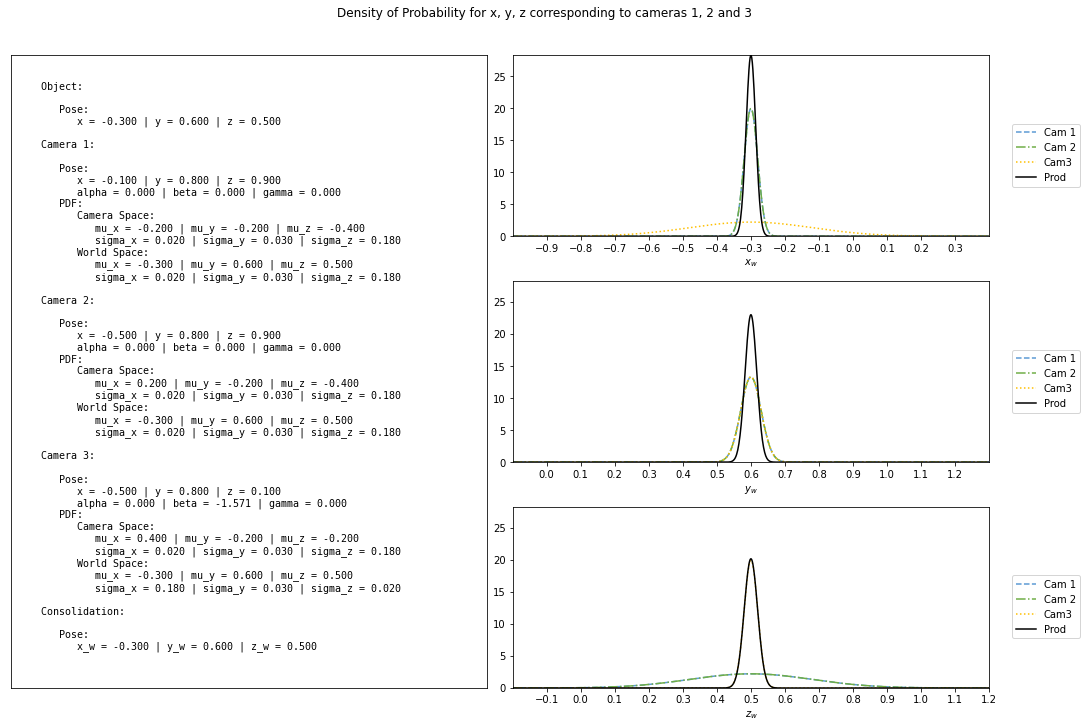

In [6]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = -0.1 # cam1:cx
cam_poses[0,1] =  0.8 # cam1:cy
cam_poses[0,2] =  0.9 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(0) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(0) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(0) # cam1:gamma

# Cam 2
cam_poses[1,0] = -0.5 # cam2:cx
cam_poses[1,1] =  0.8 # cam2:cy
cam_poses[1,2] =  0.9 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(0) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(0) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = -0.5 # cam3:cx
cam_poses[2,1] =  0.8 # cam3:cy
cam_poses[2,2] =  0.1 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(0)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(-90)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(0)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1]
delta = 0.0 # cameras are homogeneous

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.03, 0.18]) 

print("Two cameras aligned, same <mu|sigma>_<x|y|z> for all cameras")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario)


Close to setup upstairs, different <mu|sigma>_<x|y|z> for all cameras
Global x,y,z obtained after: 101.56631469726562 us
The estimated object location has the following error in [mm]: (0.000, 0.000, 0.000)


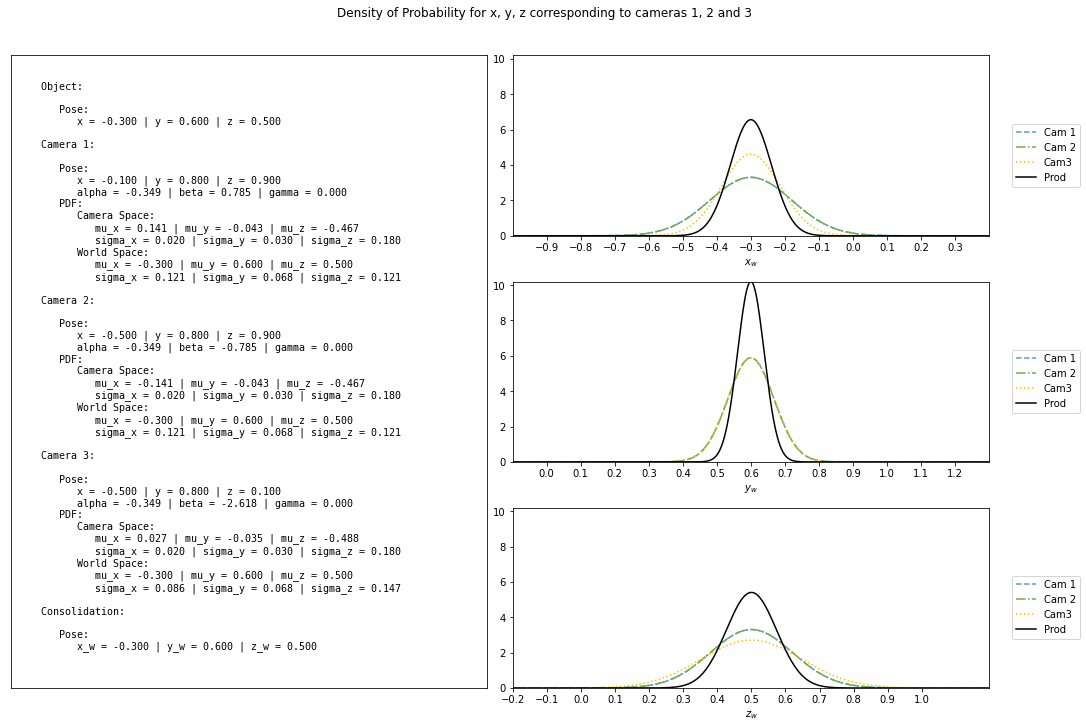

In [7]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = -0.1 # cam1:cx
cam_poses[0,1] =  0.8 # cam1:cy
cam_poses[0,2] =  0.9 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(-20) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(45) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(0) # cam1:gamma

# Cam 2
cam_poses[1,0] = -0.5 # cam2:cx
cam_poses[1,1] =  0.8 # cam2:cy
cam_poses[1,2] =  0.9 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(-20) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(-45) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = -0.5 # cam3:cx
cam_poses[2,1] =  0.8 # cam3:cy
cam_poses[2,2] =  0.1 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(-20)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(-150)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(0)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1]
delta = 0.0 # cameras are homogeneous

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.03, 0.18]) 

print("Close to setup upstairs, different <mu|sigma>_<x|y|z> for all cameras")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario)


Close to setup upstairs, different <mu|sigma>_<x|y|z> for all cameras + non-homogeneity
Global x,y,z obtained after: 56.02836608886719 us
The estimated object location has the following error in [mm]: (23.331, 10.740, 16.770)


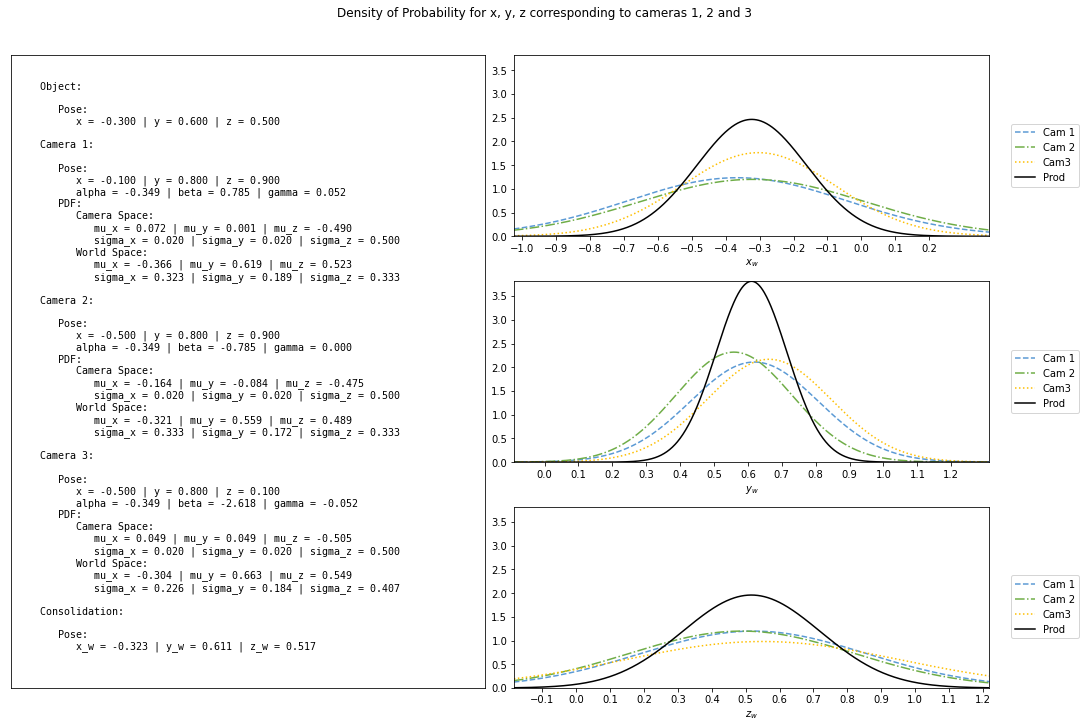

In [14]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = -0.1 # cam1:cx
cam_poses[0,1] =  0.8 # cam1:cy
cam_poses[0,2] =  0.9 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(-20) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(45) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(3) # cam1:gamma

# Cam 2
cam_poses[1,0] = -0.5 # cam2:cx
cam_poses[1,1] =  0.8 # cam2:cy
cam_poses[1,2] =  0.9 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(-20) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(-45) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = -0.5 # cam3:cx
cam_poses[2,1] =  0.8 # cam3:cy
cam_poses[2,2] =  0.1 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(-20)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(-150)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(-3)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1] # object's centroid location [x, y, z, 1]
delta = 0.10# 1.0% error introduced by camera non-homogeneity

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.02, 0.5]) 

print("Close to setup upstairs, different <mu|sigma>_<x|y|z> for all cameras + non-homogeneity")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario)


Suggestion for setup upstairs, different <mu|sigma>_<x|y|z> for all cameras + non-homogeneity
Global x,y,z obtained after: 61.27357482910156 us
The estimated object location has the following error in [mm]: (5.115, 48.668, 30.009)


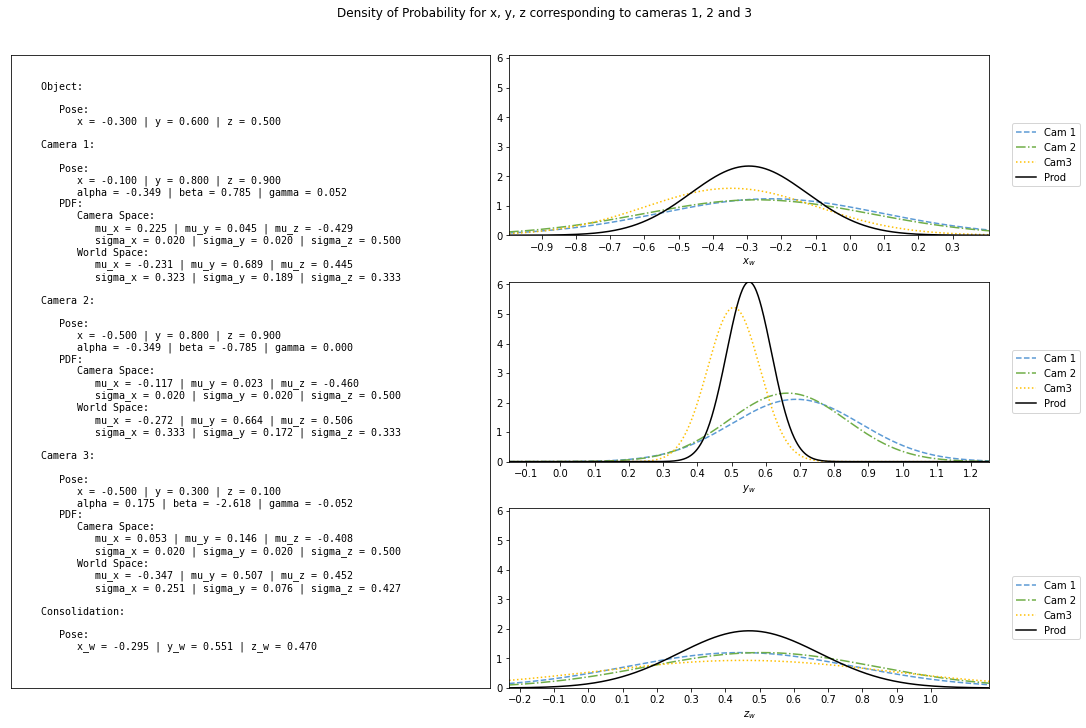

In [16]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = -0.1 # cam1:cx
cam_poses[0,1] =  0.8 # cam1:cy
cam_poses[0,2] =  0.9 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(-20) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(45) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(3) # cam1:gamma

# Cam 2
cam_poses[1,0] = -0.5 # cam2:cx
cam_poses[1,1] =  0.8 # cam2:cy
cam_poses[1,2] =  0.9 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(-20) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(-45) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = -0.5 # cam3:cx
cam_poses[2,1] =  0.3 # cam3:cy
cam_poses[2,2] =  0.1 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(10)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(-150)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(-3)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1] # object's centroid location [x, y, z, 1]
delta = 0.10# 1.0% error introduced by camera non-homogeneity

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.02, 0.5]) 

print("Suggestion for setup upstairs, different <mu|sigma>_<x|y|z> for all cameras + non-homogeneity")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, delta, scenario)


Joint probabilities obtained after: 7 seconds.


<IPython.core.display.Javascript object>


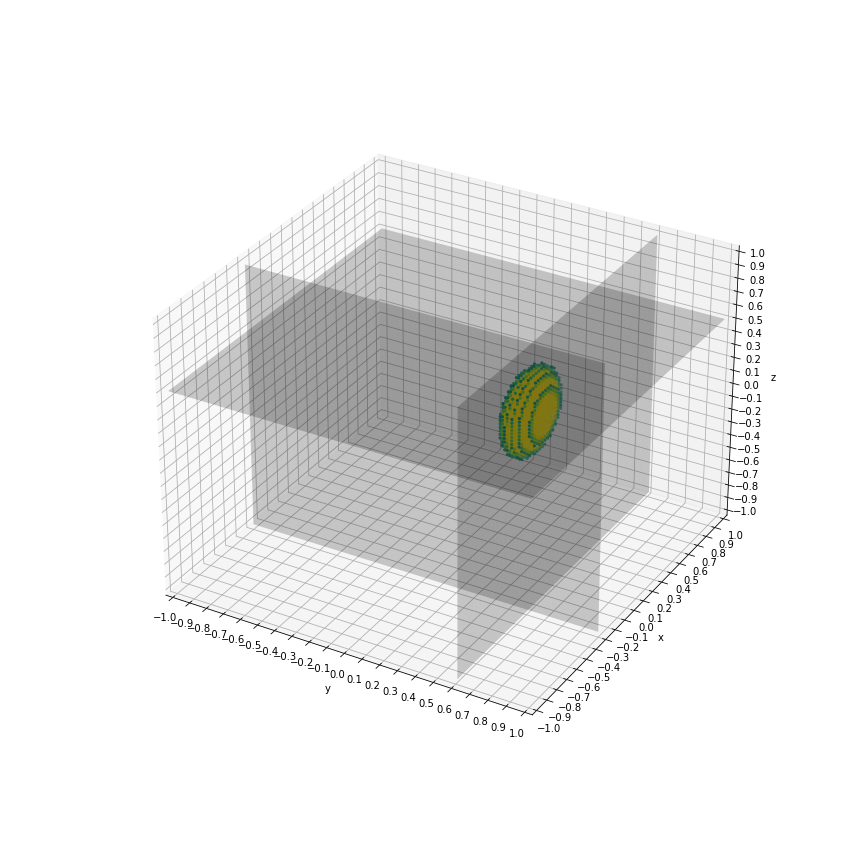

In [10]:

    
%matplotlib notebook
visualize_3d(100, mu_w[:,3], sigma_w[:,3])
